# Building and Evaluating Neural Networks for MNIST

### A) Code to load the data

In [4]:
# import pytorch
import torch

# import datasets and loader modules
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
# Download training
training_data = MNIST(
    root ='data', train=True, download=True, transform=ToTensor()
)
print(training_data)

# Download test data
test_data = MNIST(
    root ='data', train=False, download=True, transform=ToTensor()
)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
batch_size = 100

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
train_dataloader

### B) Code to plot the first image of the training set

torch.Size([1, 28, 28]) 5
tensor(1.) tensor(0.)


(-0.5, 27.5, 27.5, -0.5)

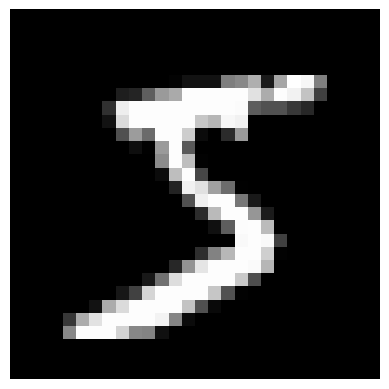

In [7]:
train_image_tensor, label = training_data[0]
# check the dimensions
print(train_image_tensor.shape, label)
# Check scale for values
print(torch.max(train_image_tensor), torch.min(train_image_tensor))
plt.imshow(train_image_tensor[0,:,:],cmap = 'gray')
plt.axis('off')

### C) Code to plot the first image of the test set

torch.Size([1, 28, 28]) 7
tensor(1.) tensor(0.)


(-0.5, 27.5, 27.5, -0.5)

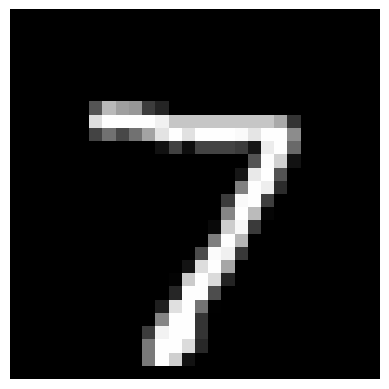

In [8]:
test_image_tensor, label = test_data[0]
# check the dimensions
print(test_image_tensor.shape, label)
# Check scale for values
print(torch.max(test_image_tensor), torch.min(test_image_tensor))
plt.imshow(test_image_tensor[0,:,:],cmap = 'gray')
plt.axis('off')

### D) Code of the class for the single hidden layer neural network

In [9]:
# Build the neural network
from torch import nn

# Device configuration, this is to check if GPU is available and run on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28*28
hidden_size = 400
output_size = 10

In [ ]:
# Fully-connected feedforward network with one hidden layer
class SingleLayerNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.act = nn.ReLU()

    def forward(self, x):
        res = self.input_layer(x)
        res = self.act(self.output_layer(res))
        return res

# Set parameters
nn_model_pb2 = SingleLayerNeuralNetwork().to(device)
nn_model_pb2

SingleLayerNeuralNetwork(
  (input_layer): Linear(in_features=784, out_features=400, bias=True)
  (output_layer): Linear(in_features=400, out_features=10, bias=True)
  (act): ReLU()
)

### E) Code to define the functions to test and train of a neural network model

In [11]:
from pandas import DataFrame

# Test the model
def test_neural_network(epoch, nn_model, accuracy_dict):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_dataloader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            
            outputs = nn_model(images)

            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()
        
        acc = 100.0 * n_correct / n_samples
        accuracy_dict["Epoch"].append(epoch + 1)
        accuracy_dict["Accuracy"].append(acc)
        print(f'Epoch {epoch+1}: Accuracy = {acc}')

# Test & Train the model for each epoch
def test_train_neural_network(n_epochs, nn_model, loss_fn, optimizer):
    # To export Accuracy in the report
    accuracy_dict = {
        "Epoch" : list(),
        "Accuracy" : list()
    }
    
    for epoch in range(n_epochs):
        # Train the model for the current epoch
        for i, (images, labels) in enumerate(train_dataloader):
            # reshape to batch_size, input_size
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            
            # apply forwar of our nn_model
            outputs = nn_model(images)
            
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Test the model for the current epoch
        test_neural_network(epoch, nn_model, accuracy_dict)

    return DataFrame(accuracy_dict)

### F) Code to train and test the model with a single hidden layer

In [ ]:
# Set parameters
loss_fn_pb2 =  nn.CrossEntropyLoss()
optimizer_pb2 = torch.optim.SGD(
    nn_model_pb2.parameters(), lr=0.001, momentum=0.99
)

# train & test the model
n_epochs_pb2 = 20

accuracy_pb2 = test_train_neural_network(
    n_epochs_pb2,
    nn_model_pb2,
    loss_fn_pb2,
    optimizer_pb2
)

Epoch 1: Accuracy = 90.33
Epoch 2: Accuracy = 91.62
Epoch 3: Accuracy = 91.87
Epoch 4: Accuracy = 92.1
Epoch 5: Accuracy = 92.12
Epoch 6: Accuracy = 92.2
Epoch 7: Accuracy = 92.28
Epoch 8: Accuracy = 92.32
Epoch 9: Accuracy = 92.32
Epoch 10: Accuracy = 92.3
Epoch 11: Accuracy = 92.32
Epoch 12: Accuracy = 92.31
Epoch 13: Accuracy = 92.29
Epoch 14: Accuracy = 92.35
Epoch 15: Accuracy = 92.32
Epoch 16: Accuracy = 92.29
Epoch 17: Accuracy = 92.33
Epoch 18: Accuracy = 92.39
Epoch 19: Accuracy = 92.46
Epoch 20: Accuracy = 92.45


### G) Code of the class for the double hidden layer neural network

In [13]:
# Hidden layers size
hidden_size_pb3_1 = 500
hidden_size_pb3_2 = 300

class TwoLayersNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_size_pb3_1)
        self.hidden_layers = nn.Linear(hidden_size_pb3_1, hidden_size_pb3_2)
        self.output_layer = nn.Linear(hidden_size_pb3_2, output_size)
        self.act1 = nn.ReLU()
        self.act2 = nn.ReLU()

    def forward(self, x):
        res = self.input_layer(x)
        res = self.act1(self.hidden_layers(res))
        res = self.act2(self.output_layer(res))
        return res

nn_model_pb3 = TwoLayersNeuralNetwork().to(device)
loss_fn_pb3 =  nn.CrossEntropyLoss()
optimizer_pb3 = torch.optim.SGD(
    nn_model_pb3.parameters(), 
    lr=0.001,
    momentum=0.99, 
    weight_decay=0.0001
)
nn_model_pb3

TwoLayersNeuralNetwork(
  (input_layer): Linear(in_features=784, out_features=500, bias=True)
  (hidden_layers): Linear(in_features=500, out_features=300, bias=True)
  (output_layer): Linear(in_features=300, out_features=10, bias=True)
  (act1): ReLU()
  (act2): ReLU()
)

###  H) Code to train and test the model with double hidden layer

In [14]:
# Number of epochs
n_epochs_pb3 = 50 # at least 40

accuracy_pb3 = test_train_neural_network(
    n_epochs_pb3,
    nn_model_pb3,
    loss_fn_pb3,
    optimizer_pb3,
)

Epoch 1: Accuracy = 70.89
Epoch 2: Accuracy = 81.52
Epoch 3: Accuracy = 83.05
Epoch 4: Accuracy = 84.07
Epoch 5: Accuracy = 84.75
Epoch 6: Accuracy = 84.95
Epoch 7: Accuracy = 85.23
Epoch 8: Accuracy = 85.54
Epoch 9: Accuracy = 85.77
Epoch 10: Accuracy = 96.84
Epoch 11: Accuracy = 97.09
Epoch 12: Accuracy = 97.25
Epoch 13: Accuracy = 97.47
Epoch 14: Accuracy = 97.51
Epoch 15: Accuracy = 97.53
Epoch 16: Accuracy = 97.56
Epoch 17: Accuracy = 97.57
Epoch 18: Accuracy = 97.67
Epoch 19: Accuracy = 97.64
Epoch 20: Accuracy = 97.68
Epoch 21: Accuracy = 97.69
Epoch 22: Accuracy = 97.78
Epoch 23: Accuracy = 97.78
Epoch 24: Accuracy = 97.7
Epoch 25: Accuracy = 97.62
Epoch 26: Accuracy = 97.57
Epoch 27: Accuracy = 97.5
Epoch 28: Accuracy = 97.53
Epoch 29: Accuracy = 97.59
Epoch 30: Accuracy = 97.68
Epoch 31: Accuracy = 97.76
Epoch 32: Accuracy = 97.87
Epoch 33: Accuracy = 97.99
Epoch 34: Accuracy = 97.96
Epoch 35: Accuracy = 97.93
Epoch 36: Accuracy = 97.81
Epoch 37: Accuracy = 97.82
Epoch 38: Ac

### I) Code of the class for the convolutional neural network

In [ ]:
hidden_size_pb4 = 50

# Feedforward network with at least two convolutional layers
class ConvolutionalLayersNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, 
            out_channels=16,
            kernel_size=5, 
            stride=1, 
            padding=0
        )
        self.pool1 = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.conv2 = nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.pool2 = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.hidden_layer = nn.Linear(32*4*4, hidden_size_pb4)
        self.flat = nn.Flatten()
        self.output_layer = nn.Linear(hidden_size_pb4, output_size)
        self.act = nn.ReLU()

    def forward(self, x):
        res = self.conv1(x)
        res = self.pool1(res)
        res = self.conv2(res)
        res = self.pool2(res)
        res = self.flat(res)
        res = self.act(self.hidden_layer(res))
        res = self.output_layer(res)
        return res

nn_model_pb4 = ConvolutionalLayersNeuralNetwork().to(device)
loss_fn_pb4 =  nn.CrossEntropyLoss()
optimizer_pb4 = torch.optim.SGD(
    nn_model_pb4.parameters(), 
    lr=0.001,
    momentum=0.99
)
nn_model_pb4

ConvolutionalLayersNeuralNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_layer): Linear(in_features=512, out_features=50, bias=True)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
  (act): ReLU()
)

###  J) Code to train and test the model with convolutional layers

In [16]:
# Train the model
n_epochs_pb4 = 50

# To export data
accuracy_pb4 = {
    "Epoch": list(),
    "Accuracy": list()
}

for epoch in range(n_epochs_pb4):
    for images, labels in train_dataloader:
        outputs = nn_model_pb4(images)

        loss = loss_fn_pb4(outputs, labels)
        optimizer_pb4.zero_grad()
        loss.backward()
        optimizer_pb4.step()

    # Test the model
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_dataloader:
            outputs = nn_model_pb4(images)
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        accuracy_pb4["Epoch"].append(epoch + 1)
        accuracy_pb4["Accuracy"].append(acc)
        print(f'Epoch: {epoch+1}, Accuracy: {acc}')

Epoch: 1, Accuracy: 95.45
Epoch: 2, Accuracy: 97.86
Epoch: 3, Accuracy: 98.09
Epoch: 4, Accuracy: 98.48
Epoch: 5, Accuracy: 98.48
Epoch: 6, Accuracy: 98.27
Epoch: 7, Accuracy: 98.39
Epoch: 8, Accuracy: 98.61
Epoch: 9, Accuracy: 98.7
Epoch: 10, Accuracy: 98.65
Epoch: 11, Accuracy: 98.67
Epoch: 12, Accuracy: 98.77
Epoch: 13, Accuracy: 98.68
Epoch: 14, Accuracy: 98.74
Epoch: 15, Accuracy: 98.76
Epoch: 16, Accuracy: 98.73
Epoch: 17, Accuracy: 98.75
Epoch: 18, Accuracy: 98.55
Epoch: 19, Accuracy: 98.8
Epoch: 20, Accuracy: 98.87
Epoch: 21, Accuracy: 98.86
Epoch: 22, Accuracy: 98.76
Epoch: 23, Accuracy: 98.78
Epoch: 24, Accuracy: 98.72
Epoch: 25, Accuracy: 98.87
Epoch: 26, Accuracy: 98.86
Epoch: 27, Accuracy: 98.81
Epoch: 28, Accuracy: 98.83
Epoch: 29, Accuracy: 98.82
Epoch: 30, Accuracy: 98.81
Epoch: 31, Accuracy: 98.85
Epoch: 32, Accuracy: 98.86
Epoch: 33, Accuracy: 98.82
Epoch: 34, Accuracy: 98.81
Epoch: 35, Accuracy: 98.84
Epoch: 36, Accuracy: 98.9
Epoch: 37, Accuracy: 98.9
Epoch: 38, Acc